# Classification with Decision Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# import iris dataset
from sklearn.datasets import load_iris

## Load the data

We'll use the [Iris dataset](https://archive.ics.uci.edu/dataset/53/iris), which contains 4 features (petal length, petal width, sepal length, sepal width) about 3 species of iris.

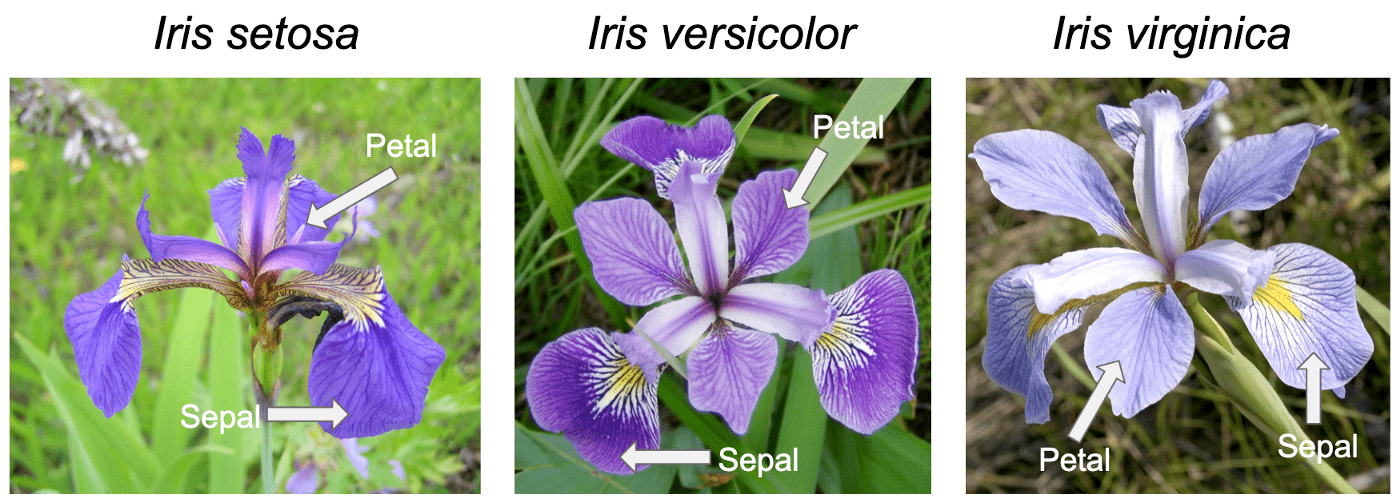

In [2]:
iris = load_iris() # we imported this function specifically to get the data

X = iris.data # features (petal and sepal length and width)
y = iris.target # labels (species)

# convert it to a dataframe to visualize more easily
df = pd.DataFrame(X, columns=iris.feature_names)
# pd.Categorical.from_codes will give us the names of the species, rather than indices
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].value_counts() # how many of each species?

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Create a train-test split

In [4]:
from sklearn.model_selection import train_test_split 

# set the random seed for reproducibility
# specify that the test set should be 1/3 of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.333)

In [5]:
type(X_train)

numpy.ndarray

Make train and test dataframes (this isn't necessary, but is helpful for visualizing the data)

In [6]:
df_train = pd.DataFrame(X_train, columns=iris.feature_names)
df_train['species'] = pd.Categorical.from_codes(y_train, iris.target_names)

df_test = pd.DataFrame(X_test, columns=iris.feature_names)
df_test['species'] = pd.Categorical.from_codes(y_test, iris.target_names)

df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,6.7,3.1,4.4,1.4,versicolor
1,7.2,3.0,5.8,1.6,virginica
2,5.1,3.3,1.7,0.5,setosa
3,6.1,2.9,4.7,1.4,versicolor
4,5.7,2.5,5.0,2.0,virginica


How big are the two datasets?

In [7]:
print(len(df_train))
print(len(df_test))

100
50


## Train the decision tree

Initialize a decision tree object

In [8]:
# random seed for reproducibility (not strictly necessary here, but good practice)
dt = DecisionTreeClassifier(random_state=0)

Fit the tree to the train data

In [9]:
dt.fit(X_train, y_train) # fit ("train") the tree 

DecisionTreeClassifier(random_state=0)

In [10]:
dt

DecisionTreeClassifier(random_state=0)

We'll figure out how to display the decision tree soon. 

## Evaluate the decision tree

First, let's look at the accuracy.

In [12]:
# score function computes accuracy (computes the predictions for X_train and compares to 
# ground truth y_train)
train_accuracy = dt.score(X_train, y_train)
print("Train accuracy: %.0f percent" % (train_accuracy*100))


Train accuracy: 100 percent


In [13]:
test_accuracy = dt.score(X_test, y_test)
print("Test accuracy: %.0f percent" % (test_accuracy*100))


Test accuracy: 86 percent


The test accuracy is 14% lower than the train accuracy -- that's not good!


Let's look at what is happening in the tree

In [14]:
# helpful function to visualize DecisionTreeClassifier object. Will save it to the file "tree.dot"
export_graphviz(dt, out_file='tree.dot', feature_names=iris.feature_names)



In [15]:
# convert dot file to png
!dot -Tpng tree.dot -o tree.png

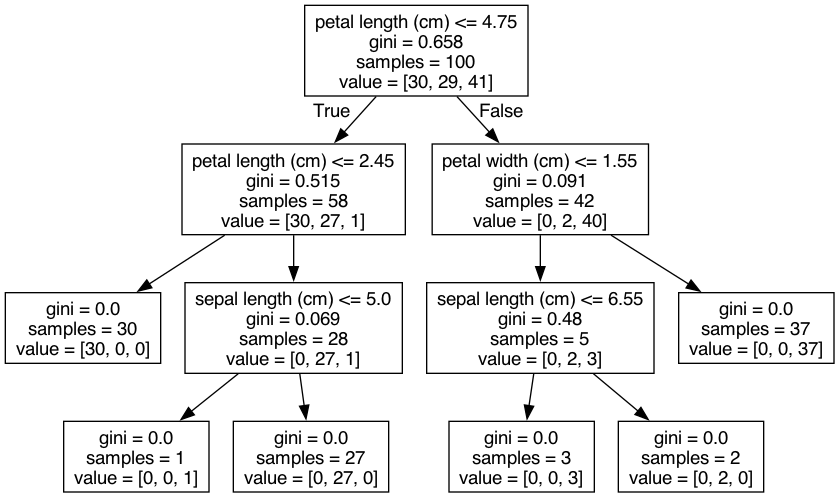

In [16]:
# display png
from IPython.display import Image
Image(filename='tree.png')


## Question: 
Why is the test accuracy so much worse than the train accuracy?

### Answer: Overfitting

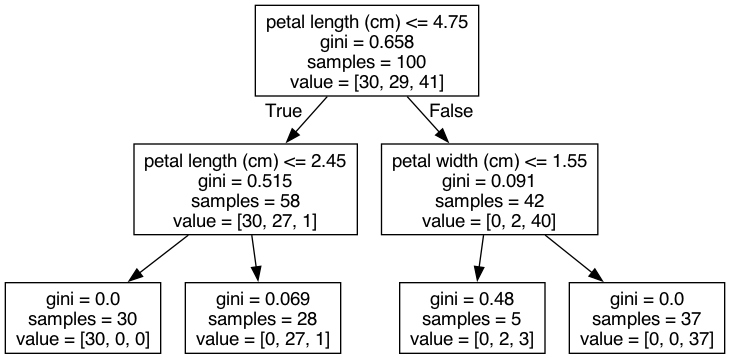

In [ ]:
# run the same code (condensed into one cell)
# but now, use the "max_depth" parameter to limit the depth of the tree
dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_train, y_train)

export_graphviz(dt, out_file='tree2.dot', feature_names=iris.feature_names)
!dot -Tpng tree2.dot -o tree2.png

Image(filename='tree2.png')

What is the train accuracy on the deep tree?

In [18]:
train_accuracy = dt.score(X_train, y_train)
print('Train accuracy: %.2f' % train_accuracy)

Train accuracy: 0.97


What about test accuracy?

In [19]:
test_accuracy = dt.score(X_test, y_test)
print('Test accuracy: %.2f' % test_accuracy)

Test accuracy: 0.92


The train accuracy is worse (100% vs. 97%), but the test accuracy is a lot better (86% vs 92%).



### Question:
Are we satisfied with the tree we have built? Is there any overfitting?

### Answer: Yes, look at the right branch

We split the right child of the root node, but both branches end up being predicted as the same class.

How can we avoid this?


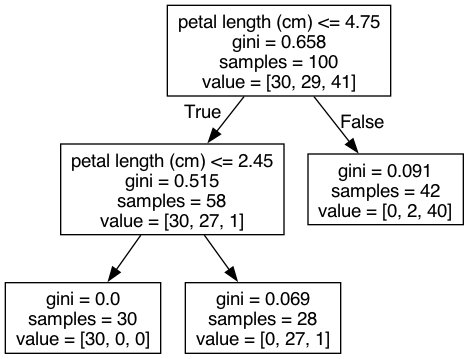

In [20]:
# run the same code, but add in "min_impurity_decrease" parameter
# this will prevent us from splitting nodes that we don't need to (formally, won't split
# unless it'll decrease the impurity by at least 0.05)
dt = DecisionTreeClassifier(random_state=0, max_depth=2, min_impurity_decrease=0.05)
dt.fit(X_train, y_train)

export_graphviz(dt, out_file='tree3.dot', feature_names=iris.feature_names)
!dot -Tpng tree3.dot -o tree3.png

Image(filename='tree3.png')

What are the train and test accuracies for this tree?


In [21]:
train_accuracy = dt.score(X_train, y_train)
print('Train accuracy: %.0f percent' % (train_accuracy*100))

Train accuracy: 97 percent


In [22]:
test_accuracy = dt.score(X_test, y_test)
print('Test accuracy: %.0f percent' % (test_accuracy*100))

Test accuracy: 92 percent


They're the same!